In [1]:
from ubxutils import testubxcoherence
fubxA = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.ubx"
fubxB = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.ubx"
fubxC = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.ubx"

testubxcoherence(fubxA)
testubxcoherence(fubxB)
testubxcoherence(fubxC)


0 160 0x1 0x22 20 True
1753 0 0x2 0x15 656 False
1754 34 0x1 0x22 20 True
2256 0 0x2 0x13 24 False
2257 85 0x1 0x30 284 True
ord() expected a character, but string of length 0 found
records 3864 byteposition 953223
ord() expected a character, but string of length 0 found
records 3716 byteposition 932892
0 160 0x1 0x22 20 True
1817 0 0x2 0x15 656 False
1818 247 0x1 0x22 20 True
ord() expected a character, but string of length 0 found
records 4064 byteposition 989879


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt


In [3]:
from ubxutils import convbinfile, calcpossingle, loadposfile, calcavgposition, updatexytime, calcposrtk

convbinfile(fubxC)
llhC = calcavgposition(fubxC)
print("base pos", llhC)


base pos (54.592283151104105, -5.927393144966705, 74.80411592091586)


In [4]:
convbinfile(fubxA)
wA = calcposrtk(fubxC, llhC, fubxA)
updatexytime(wA)


/home/julian/extrepositories/RTKLIB-rtkexplorer/app/rnx2rtkp/gcc/rnx2rtkp -k /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.conf -o /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.pos /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.nav


In [4]:
convbinfile(fubxA)
wA = calcposrtk(fubxC, llhC, fubxA)
updatexytime(wA)

convbinfile(fubxB)
wB = calcposrtk(fubxC, llhC, fubxB)
updatexytime(wB)


/home/julian/extrepositories/RTKLIB-rtkexplorer/app/rnx2rtkp/gcc/rnx2rtkp -k /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.conf -o /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.pos /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.nav
/home/julian/extrepositories/RTKLIB-rtkexplorer/app/rnx2rtkp/gcc/rnx2rtkp -k /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.conf -o /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.pos /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.nav


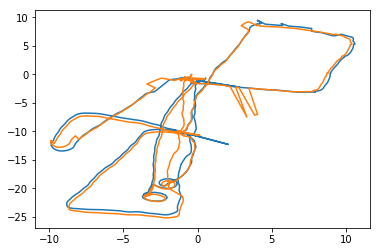

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

#plt.plot(wA.x, wA.y)
plt.plot(wA.x+0.5, wA.y-0.8)
plt.plot(wB.x, wB.y)
plt.savefig("test.png")

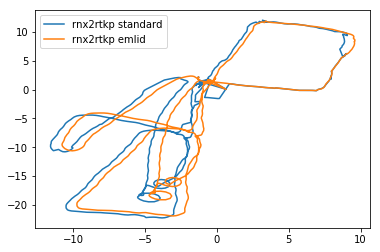

In [10]:
w = loadposfile("/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.pos")
updatexytime(w)
plt.plot(w.x, w.y, label="rnx2rtkp standard")
w = loadposfile("/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26Ae.pos")
updatexytime(w)
plt.plot(w.x, w.y, label="rnx2rtkp emlid")
plt.legend()
plt.savefig("test.png")

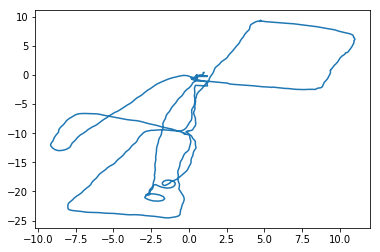

In [17]:
w1 = loadposfile("/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.pos")
updatexytime(w1)
plt.plot(w1.x, w1.y)


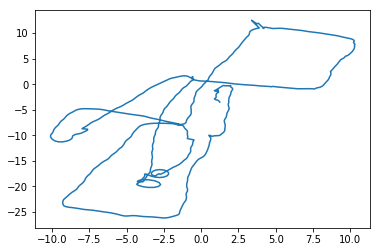

In [20]:
import pandas
wg = loadposfile("/home/julian/data/hanglog/hdataGG.pos")
#updatexytime(wg)
#plt.plot(wg.x, wg.y)
columnnames = "%  GPST                  latitude(deg) longitude(deg)  height(m)   Q  ns   sdn(m)   sde(m)   sdu(m)  sdne(m)  sdeu(m)  sdun(m) age(s)  ratio".split()
fpos = "/home/julian/data/hanglog/hdataG.pos"
wg = pandas.read_csv(fpos, header=None, names=columnnames, sep="\s+")
updatexytime(wg)
plt.plot(wg.x, wg.y)

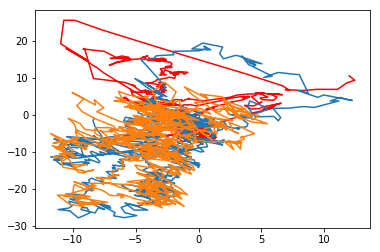

In [8]:
plt.plot(wC.x, wC.y, color="red")
plt.plot(wA.x, wA.y)
plt.plot(wB.x, wB.y)


In [36]:
import pandas, math

lng0, lat0 = None, None
GPS_UTC_SECONDS_DIFFERENCE = -18
def loadposfile(fname):
    global lng0, lat0
    for percentrows, row in enumerate(open(fname)):
        if row[0] != "%":
            break
    w = pandas.read_csv(fname, skiprows=percentrows-1, sep="\s+")
    w["time"] = pandas.to_datetime(w["GPST"]) + pandas.Timedelta(seconds=GPS_UTC_SECONDS_DIFFERENCE)
    w = w.set_index("time")
    
    earthrad = 6378137
    nyfac = 2*math.pi*earthrad/360
    if lng0 is None:
        lng0, lat0 = w[["longitude(deg)", "latitude(deg)"]].iloc[0]
    exfac = nyfac*math.cos(math.radians(lat0))
    w["x"] = (w["longitude(deg)"] - lng0)*exfac  
    w["y"] = (w["latitude(deg)"] - lat0)*nyfac
    w["z"] = w["height(m)"]
    return w
wkA = loadposfile("/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.pos")
wkB = loadposfile("/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.pos")



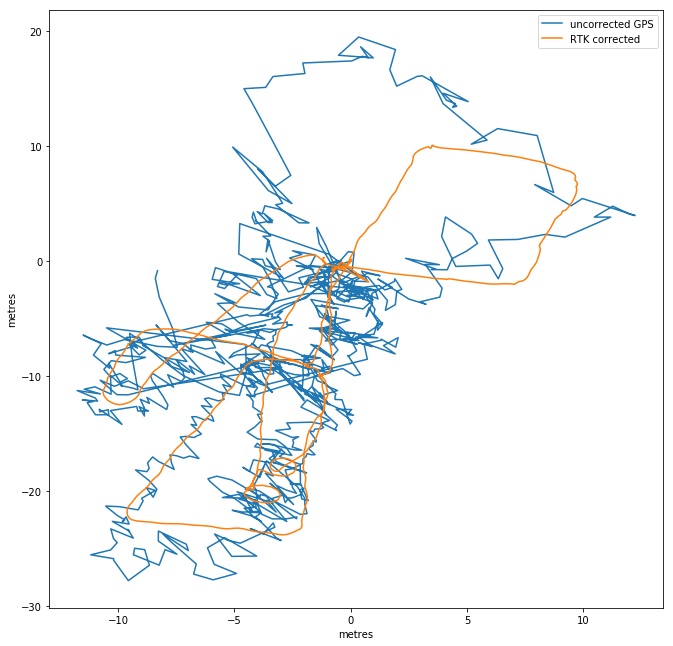

In [48]:
plt.figure(figsize=(11,11))
plt.plot(wA.x, wA.y, label="uncorrected GPS")
plt.plot(wkA.x, wkA.y, label="RTK corrected")
plt.xlabel("metres")
plt.ylabel("metres")
plt.legend()
plt.savefig("test.png")

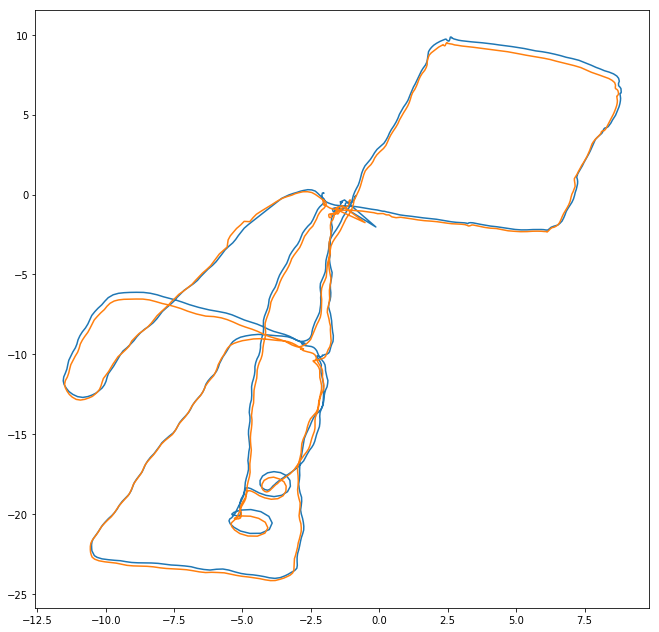

In [45]:
plt.figure(figsize=(11,11))
plt.plot(wkA.x-0.9, wkA.y-0.2)
plt.plot(wkB.x, wkB.y)


In [58]:
import shutil
fubxRover = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.nav"
fobsRover = os.path.splitext(fubxRover)[0]+".obs"
shutil.rmtree(fobsRover, ignore_errors=True)

In [69]:
import subprocess, os, shutil
def calcposrtk(fubxBase, fubxRover):
    fconfBase = os.path.splitext(fubxBase)[0]+".conf"
    fobsBase = os.path.splitext(fubxBase)[0]+".obs"
    fnavBase = os.path.splitext(fubxBase)[0]+".nav"
    fobsRover = os.path.splitext(fubxRover)[0]+".obs"
    fnavRover = os.path.splitext(fubxRover)[0]+".nav"
    fposRover = os.path.splitext(fubxRover)[0]+".pos"
    for f in [fobsRover, fnavRover, fobsBase, fnavBase, fposRover]:
        shutil.rmtree(f, ignore_errors=True)    
        
    subprocess.check_output(["convbin", "-od", "-os", "-oi", "-ot", "-ol", "-r", "ubx", fubxRover])
    subprocess.check_output(["convbin", "-od", "-os", "-oi", "-ot", "-ol", "-r", "ubx", fubxBase])

    with open(fconfBase, "w") as fc:
        fc.write("pos1-posmode=kinematic\npos1-soltype=combined\npos1-dynamics=on\n")

    print(" ".join(rcmd))
    rcmd = ["rnx2rtkp", "-k", fconfBase, "-o", fposRover, fobsRover, fobsBase, fnavBase]
    subprocess.check_output(rcmd)
    return loadposfile(fposRover)

wkA = calcposrtk(fubxC, fubxA)


rnx2rtkp -k /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.conf -o /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.pos /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.obs /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.nav


In [27]:
rnx2rtkp -k hdata-2019-03-06_13-32-26C.conf -o hdata-2019-03-06_13-32-26A.pos hdata-2019-03-06_13-32-26A.obs hdata-2019-03-06_13-32-26C.obs hdata-2019-03-06_13-32-26C.nav

convbin -od -os -oi -ot -ol -r ubx /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.ubx


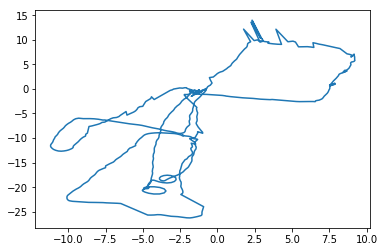

In [80]:
w = loadposfile("/home/julian/data/hanglog/orneaubaths1/hdataRover.pos")
plt.plot(w.x, w.y)


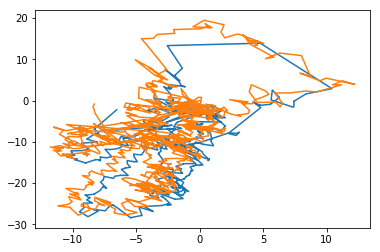

In [70]:
plt.plot(wkA.x, wkA.y)
plt.plot(wA.x, wA.y)


In [15]:
wkB = calcposrtk(fubxC, fubxB)


/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.pos


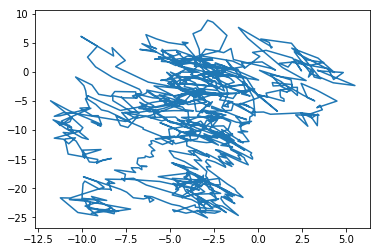

In [16]:
plt.plot(wkB.x, wkB.y)


In [6]:
import socket, time
ss = socket.socket()
androidipnumber = "192.168.43.1"
portnumber = 9042

# This is all that's required to connect - when the ESP is hanging on s.accept()
ss.connect(socket.getaddrinfo(androidipnumber, portnumber)[0][-1])
s = ss.makefile('rwb', 0)  # convert socket into an io stream

print(s.readline())
s.write(b"-AAA")

b'Hello from Android thread 7\n'


4

In [ ]:
rnx2rtkp hdataRover.obs hdataBase.obs hdataBase.nav

In [7]:

fout = open("templogging.ubx", "wb")
n = 0
kprev = None
while n < 200000:
    x = s.read(100)
    if int(n/10000) != int((n+len(x))/10000):
        print(n)
    n += len(x)
    fout.write(x)
fout.close()

9900
19940
29960
39976
49920
59960
69960
79976
89920
99960
109980
119976
129920
139960
149980
159980
169960
179960
189980
199900


In [ ]:
/home/julian/extrepositories/RTKLIB/app/convbin/gcc/convbin -od -os -oi -ot -ol -r ubx /home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.ubx
/home/julian/extrepositories/RTKLIB/app/rnx2rtkp/gcc/rnx2rtkp -k hdata.conf -p 2 hdataRover.obs hdataBase.obs hdataBase.nav



In [ ]:
fubx = "hdata-2019-03-04_09-23-38B.ubx"

In [108]:
import subprocess, os
subprocess.check_output(["convbin", "-od", "-os", "-oi", "-ot", "-f", "1", fubx])
fobs = os.path.splitext(fubx)[0]+".obs"
fnav = os.path.splitext(fubx)[0]+".nav"
fpos1 = os.path.splitext(fubx)[0]+".pos1"
subprocess.check_output(["rnx2rtkp", "-o", fpos1, "-p", "0", fobs, fnav]) 


b''

In [118]:
import pandas, math

lng0, lat0 = None, None
GPS_UTC_SECONDS_DIFFERENCE = -18
def loadpos(fname):
    for percentrows, row in enumerate(open(fname)):
        if row[0] != "%":
            break
    global lng0, lat0
    w = pandas.read_csv(fname, skiprows=percentrows-1, sep="\s+")
    w["time"] = pandas.to_datetime(w["GPST"]) + pandas.Timedelta(seconds=GPS_UTC_SECONDS_DIFFERENCE)
    w = w.set_index("time")
    
    earthrad = 6378137
    nyfac = 2*math.pi*earthrad/360
    if lng0 is None:
        lng0, lat0 = w[["longitude(deg)", "latitude(deg)"]].iloc[0]
    exfac = nyfac*math.cos(math.radians(lat0))
    w["x"] = (w["longitude(deg)"] - lng0)*exfac  
    w["y"] = (w["latitude(deg)"] - lat0)*nyfac
    w["z"] = w["height(m)"]

    return w
w = loadpos(fpos1)

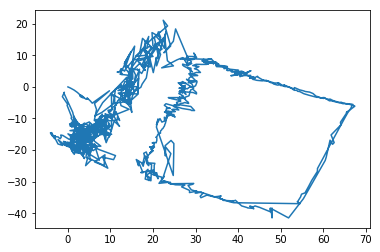

In [120]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(w.x, w.y)

In [116]:
fname = fpos1
for percentrows, row in enumerate(open(fname)):
    if row[0] != "%":
        break
percentrows

8

In [121]:
w = pandas.read_csv(fpos1, skiprows=percentrows-1, sep="\s+")
w;

In [125]:
# rtk version
import subprocess, os
fubxRover = "hdata-2019-03-04_09-23-38B.ubx"
fubxBase = "hdata-2019-03-04_09-23-37C.ubx"
subprocess.check_output(["convbin", "-od", "-os", "-oi", "-ot", "-f", "1", fubxRover])
subprocess.check_output(["convbin", "-od", "-os", "-oi", "-ot", "-f", "1", fubxBase])
fobsRover = os.path.splitext(fubxRover)[0]+".obs"
fobsBase = os.path.splitext(fubxBase)[0]+".obs"
fnavBase = os.path.splitext(fubxBase)[0]+".nav"
fposRover = os.path.splitext(fubxRover)[0]+".pos"
subprocess.check_output(["rnx2rtkp", "-o", fposRover, "-p", "2", "-c", fobsRover, fobsBase, fnavBase]) 


b''

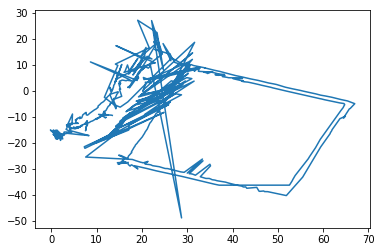

In [127]:
w = loadpos(fposRover)
plt.plot(w.x, w.y)

In [9]:
# Code for checking the coherence of a UBX file

import struct
def skipto_b562(fin):
    b0 = ord(fin.read(1))
    for i in range(10000):
        b1 = ord(fin.read(1))
        if b0 == 0xb5 and b1 == 0x62:
            return i
        b0 = b1
    return -1

def checkchecksumUBX(header, payload, cca, ccb):
    ca, cb = 0, 0
    for c in header:
        ca = (ca + c) & 0xFF
        cb = (cb + ca) & 0xFF
    for c in payload:
        ca = (ca + c) & 0xFF
        cb = (cb + ca) & 0xFF
    return ca == cca and cb == ccb

def testubxcoherence(fubx):
    fin = open(fubx, "rb")
    try:
        for i in range(10000):
            gapbytes = skipto_b562(fin)
            header = fin.read(4)
            clsID, msgID, payloadlength = struct.unpack("<BBH", header)
            payload = fin.read(payloadlength)
            cca = ord(fin.read(1))
            ccb = ord(fin.read(1))
            checksumgood = checkchecksumUBX(header, payload, cca, ccb)
            if not checksumgood or gapbytes != 0:
                print(i, gapbytes, hex(clsID), hex(msgID), len(payload), checksumgood)
    except Exception as e:
        print(e)
    print("records", i, "byteposition", fin.tell())


    
fubx = "templogging.ubx"
#fubx = "/home/julian/data/hanglog/hdata-2019-03-05_18-43-27C.ubx"
#fubx = fubxRover
testubxcoherence(fubx)

# (it's expected for the start record to be corrupted)

ord() expected a character, but string of length 0 found
records 1872 byteposition 200000


In [12]:
fubxA = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26A.ubx"
fubxB = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26B.ubx"
fubxC = "/home/julian/data/hanglog/orneaubaths1/hdata-2019-03-06_13-32-26C.ubx"

testubxcoherence(fubxC)


0 160 0x1 0x22 20 True
1817 0 0x2 0x15 656 False
1818 247 0x1 0x22 20 True
ord() expected a character, but string of length 0 found
records 4064 byteposition 989879
